# CAPSTONE PROJECT

by Joyce Ooi

# Notebook 3: Modelling

This notebook contains the code for model selection and evaluation.

## Contents

- [Importing of Libraries](#Importing-of-Libraries)
- [Data Import](#Data-Import)
- [Data Preparation](#Data-Preparation)
- [Baseline Accuracy](#Baseline-Accuracy)
- [Randomised Search for the Best Classifier](#Randomised-Search-for-the-Best-Classifier)
- [Selection of the Best Classifier](#Selection-of-the-Best-Classifier)
- [Further Exploration of the Best Classifier](#Further-Exploration-of-the-Best-Classifier)
- [Generation of Predictions](#Generation-of-Predictions)
- [Conclusion](#Conclusion)

# Importing of Libraries

In [1]:
# Read in libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from mpl_toolkits import mplot3d
from sklearn import ensemble, preprocessing
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
#modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from keras.preprocessing.sequence import TimeseriesGenerator

# import xgboost as xgb
# from xgboost.sklearn import XGBClassifier

%matplotlib inline 

Using TensorFlow backend.


In [2]:
# Import data from downloaded csv files
train=pd.read_csv('./datasets/tsla_train.csv')
test_actual=pd.read_csv('./datasets/tsla_test.csv')


In [3]:
train.shape, test_actual.shape

((1970, 50), (466, 50))

In [4]:
train.head(100)

,Unnamed: 0,date,tsla_intra_target,tsla_sentiment,em_tweets3_sentiment,dax_return,cac_return,dji_previous_day_return,MA5,MA10,...,em_tweets3_sentiment_lag3,dax_return_lag3,cac_return_lag3,dji_previous_day_return_lag3,MA5_lag3,MA10_lag3,MA20_lag3,MA50_lag3,change_lag3,volatity_lag3
0,30,2010-08-12,1.0,0.0,0.0,-1.0,1.0,-1.0,18.490,19.168,...,0.0,1.0,1.0,-1.0,19.986,19.824,19.7955,19.6968,0.000510,0.041525
1,31,2010-08-13,0.0,0.0,0.0,-1.0,-1.0,-1.0,18.326,18.919,...,0.0,-1.0,-1.0,1.0,19.314,19.662,19.6860,19.6720,-0.029513,0.041491
2,32,2010-08-16,0.0,0.0,0.0,-1.0,-1.0,-1.0,18.350,18.753,...,0.0,-1.0,-1.0,-1.0,18.744,19.448,19.6450,19.7104,-0.061216,0.041826
3,33,2010-08-17,0.0,0.0,0.0,1.0,1.0,-1.0,18.524,18.704,...,0.0,-1.0,1.0,-1.0,18.490,19.168,19.5775,19.8278,-0.016902,0.042109
4,34,2010-08-18,1.0,0.0,0.0,1.0,-1.0,1.0,18.762,18.757,...,0.0,-1.0,-1.0,-1.0,18.326,18.919,19.5365,19.9306,0.040094,0.036775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,125,2010-12-28,0.0,0.0,0.0,-1.0,-1.0,-1.0,28.482,29.086,...,0.0,-1.0,-1.0,1.0,31.608,29.894,29.5570,29.3088,0.011404,0.037154
96,126,2010-12-29,0.0,0.0,0.0,1.0,1.0,1.0,27.256,28.612,...,0.0,-1.0,-1.0,1.0,30.446,29.814,29.3205,29.1912,-0.081039,0.033302
97,127,2010-12-30,1.0,0.0,0.0,-1.0,-1.0,1.0,26.564,28.109,...,0.0,-1.0,-1.0,1.0,29.388,29.504,29.0960,29.0780,-0.163556,0.036518
98,128,2010-12-31,0.0,0.0,0.0,0.0,0.0,-1.0,26.778,27.566,...,0.0,-1.0,-1.0,-1.0,28.482,29.086,28.9055,28.9702,0.033105,0.049272


In [5]:
test_actual.head()

,Unnamed: 0,date,tsla_intra_target,tsla_sentiment,em_tweets3_sentiment,dax_return,cac_return,dji_previous_day_return,MA5,MA10,...,em_tweets3_sentiment_lag3,dax_return_lag3,cac_return_lag3,dji_previous_day_return_lag3,MA5_lag3,MA10_lag3,MA20_lag3,MA50_lag3,change_lag3,volatity_lag3
0,2000,2018-06-11,0.0,1.0,-1.0,1.0,1.0,1.0,325.623999,321.031000,...,-1.0,1.0,-1.0,-1.0,303.056000,302.525003,309.739502,312.464601,0.092987,0.021095
1,2001,2018-06-12,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,330.679999,327.666000,...,1.0,-1.0,-1.0,1.0,308.223999,308.426001,313.142502,312.965801,-0.010730,0.028782
2,2002,2018-06-13,1.0,1.0,1.0,1.0,-1.0,-1.0,339.006000,335.075000,...,1.0,1.0,1.0,1.0,315.296002,313.732001,317.503001,313.301601,0.004955,0.028909
3,2003,2018-06-14,0.0,-1.0,-1.0,1.0,1.0,-1.0,347.108002,341.216998,...,-1.0,1.0,1.0,1.0,325.623999,321.031000,320.925001,313.656001,0.044455,0.028744
4,2004,2018-06-15,0.0,0.0,1.0,-1.0,-1.0,-1.0,354.853998,345.488998,...,-1.0,-1.0,-1.0,-1.0,330.679999,327.666000,323.714001,314.169001,0.031623,0.030147


# Data Preparation

In [6]:
train = train.drop(['Unnamed: 0'], axis = 1)
test_actual = test_actual.drop(['Unnamed: 0'], axis = 1)

In [7]:
train.head()

,date,tsla_intra_target,tsla_sentiment,em_tweets3_sentiment,dax_return,cac_return,dji_previous_day_return,MA5,MA10,MA20,...,em_tweets3_sentiment_lag3,dax_return_lag3,cac_return_lag3,dji_previous_day_return_lag3,MA5_lag3,MA10_lag3,MA20_lag3,MA50_lag3,change_lag3,volatity_lag3
0,2010-08-12,1.0,0.0,0.0,-1.0,1.0,-1.0,18.490,19.168,19.5775,...,0.0,1.0,1.0,-1.0,19.986,19.824,19.7955,19.6968,0.000510,0.041525
1,2010-08-13,0.0,0.0,0.0,-1.0,-1.0,-1.0,18.326,18.919,19.5365,...,0.0,-1.0,-1.0,1.0,19.314,19.662,19.6860,19.6720,-0.029513,0.041491
2,2010-08-16,0.0,0.0,0.0,-1.0,-1.0,-1.0,18.350,18.753,19.5065,...,0.0,-1.0,-1.0,-1.0,18.744,19.448,19.6450,19.7104,-0.061216,0.041826
3,2010-08-17,0.0,0.0,0.0,1.0,1.0,-1.0,18.524,18.704,19.4945,...,0.0,-1.0,1.0,-1.0,18.490,19.168,19.5775,19.8278,-0.016902,0.042109
4,2010-08-18,1.0,0.0,0.0,1.0,-1.0,1.0,18.762,18.757,19.4420,...,0.0,-1.0,-1.0,-1.0,18.326,18.919,19.5365,19.9306,0.040094,0.036775


In [8]:
test_actual.head()

,date,tsla_intra_target,tsla_sentiment,em_tweets3_sentiment,dax_return,cac_return,dji_previous_day_return,MA5,MA10,MA20,...,em_tweets3_sentiment_lag3,dax_return_lag3,cac_return_lag3,dji_previous_day_return_lag3,MA5_lag3,MA10_lag3,MA20_lag3,MA50_lag3,change_lag3,volatity_lag3
0,2018-06-11,0.0,1.0,-1.0,1.0,1.0,1.0,325.623999,321.031000,320.925001,...,-1.0,1.0,-1.0,-1.0,303.056000,302.525003,309.739502,312.464601,0.092987,0.021095
1,2018-06-12,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,330.679999,327.666000,323.714001,...,1.0,-1.0,-1.0,1.0,308.223999,308.426001,313.142502,312.965801,-0.010730,0.028782
2,2018-06-13,1.0,1.0,1.0,1.0,-1.0,-1.0,339.006000,335.075000,326.422002,...,1.0,1.0,1.0,1.0,315.296002,313.732001,317.503001,313.301601,0.004955,0.028909
3,2018-06-14,0.0,-1.0,-1.0,1.0,1.0,-1.0,347.108002,341.216998,329.334001,...,-1.0,1.0,1.0,1.0,325.623999,321.031000,320.925001,313.656001,0.044455,0.028744
4,2018-06-15,0.0,0.0,1.0,-1.0,-1.0,-1.0,354.853998,345.488998,331.973001,...,-1.0,-1.0,-1.0,-1.0,330.679999,327.666000,323.714001,314.169001,0.031623,0.030147


In [9]:
train.isnull().sum()

date                            0
tsla_intra_target               0
tsla_sentiment                  0
em_tweets3_sentiment            0
dax_return                      0
cac_return                      0
dji_previous_day_return         0
MA5                             0
MA10                            0
MA20                            0
MA50                            0
change                          0
volatility                      0
tsla_intra_target_lag1          0
tsla_sentiment_lag1             0
em_tweets3_sentiment_lag1       0
dax_return_lag1                 0
cac_return_lag1                 0
dji_previous_day_return_lag1    0
MA5_lag1                        0
MA10_lag1                       0
MA20_lag1                       0
MA50_lag1                       0
change_lag1                     0
volatity_lag1                   0
tsla_intra_target_lag2          0
tsla_sentiment_lag2             0
em_tweets3_sentiment_lag2       0
dax_return_lag2                 0
cac_return_lag

In [10]:
train['date']=pd.to_datetime(train['date'])

In [11]:
test_actual['date']=pd.to_datetime(test_actual['date'])

train.shape, test_actual.shape

In [12]:
# X and Y variable
X = train.drop(columns = ['tsla_intra_target', 'date']) 
y = train['tsla_intra_target']


In [13]:
X_testuntrain = test_actual.drop(columns = ['tsla_intra_target','date']) 
y_testuntrain = test_actual['tsla_intra_target']

In [14]:
#Train Test split 
X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [15]:
#X_test = test.drop(['    '], axis=1)

# Baseline Accuracy

In [16]:
y_train.value_counts(normalize = True)

1.0    0.508463
0.0    0.491537
Name: tsla_intra_target, dtype: float64

We observe above that the baseline accuracy (for predicting an intraday positive return for Tesla stock) is approximately 51.18%. The naive model will predict all 1s and will be correct 51.18% of the time.

## Balanced Class

The baseline accuracy above indicates that the **training set is balanced** 

# Randomised Search for the Best Classifier

To manage the total time and resources used to tune the hyperparameters, we use the RandomizedSearchCV to randomly find the optimal parameters for each of the models based on the training dataset, with a maximum of 50 iterations. We specify the range of parameters to be used by RandomizedSearchCV for each classifer, based on experience and past results of running the RandomizedSearchCV.

We obtain the various scores on the validation dataset for each classifier using the optimal parameters identified by RandomizedSearchCV. We will select the best classifier based on the **highest F1 and Accuracy score** found.

In [17]:
# We fit a StandardScaler() object on just the training dataset,
# then use the object to transform both the training and validation datasets

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train) #fit with X train data and use it to transform both X_train and X_valid data
X_valid_sc = ss.transform(X_valid)

X_testuntrain_sc = ss.transform(X_testuntrain) #use the same fit above with X train data on the untrained (test_actual) data set


In [18]:
# We have selected the models below for modelling purposes.
estimators = {
    'lr': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'ada': AdaBoostClassifier(random_state=42),
    'dtree': DecisionTreeClassifier(random_state=42),
    'rf': RandomForestClassifier(random_state=42),
    'etree': ExtraTreesClassifier(random_state=42),
    
#     'xgb1': XGBClassifier(random_state=42)
}.items()

In [19]:
params = {
    'lr': {
        'lr__solver': ['liblinear'],
        'lr__penalty': ['l1', 'l2', 'elasticnet'],
        'lr__C': np.logspace(1, 5, 20)
    },
    'knn': {
        'knn__n_neighbors': [ 5, 7, 9, 13],
#         'weights':['uniform','distance'],
#         'algorithm':['ball_tree','kd_tree','brute','auto'],
#         'leaf__size':range(1,152),
#         'metric':['euclidean','manhatten','minkowski']
    },
    'ada': {
        'ada__n_estimators': [100, 200, 300, 500],
        'ada__learning_rate': [1, 1.5, 2]
    },
    'dtree': {
        'dtree__max_depth': [ 3, 5, 10 ,15],
        'dtree__max_features': ['auto', 'log2', None, 50, 100],
        'dtree__min_samples_split': [5, 10, 20, 30],
        'dtree__min_samples_leaf': [ 4, 5, 6, 7]
    },
    'rf': {
        'rf__max_depth': [3, 5, 10, 20, 30],
        'rf__max_features': ['auto', 'log2', None, 50],
        'rf__min_samples_split': [2, 4, 6, 8],
        'rf__min_samples_leaf': [1, 3, 5]
    },
    'etree': {
        'etree__max_depth': [5, 10, 50, 60],
        'etree__max_features': ['auto', 'log2', None, 50],
        'etree__min_samples_split': [4, 6 ,8, 10],
        'etree__min_samples_leaf': [1, 2, 3]
    },
        
}


# Selecting the Optimal Parameters for Each Classifier 

We now use RandomizedSearchCV to select the optimal parameters for each classifier that produces the best mean accuracy score based on the training dataset.

In [20]:
%%time
# initialise empty lists to store information later
models = []
parameters = []
train_accuracy = []
val_accuracy = []
best_score = []
train_roc_auc = []
val_roc_auc = []
sensitivity = []
specificity = []

for k,v in estimators:
    pipe = Pipeline([(k,v)])
    param = params[k]
    randomsearch = RandomizedSearchCV(
        n_iter=50, # we set a max. of 50 iterations
        estimator=pipe,
        random_state=42,
        param_distributions=param,
        verbose=1,
        cv= 5,
        n_jobs=-1,
        return_train_score= True,
        scoring = 'roc_auc' # we adopt AUC score as our scoring metric as it is provides the best overall assessment
    )

    randomsearch.fit(X_train_sc, y_train)
    
    model = randomsearch.best_estimator_
    cv_score = randomsearch.cv_results_
    best_params = randomsearch.best_params_

    # predict y
    y_pred_train = model.predict(X_train_sc)
    y_pred_valid = model.predict(X_valid_sc)
    
    # print results
    print ("Model: ", k)
    print ("Best parameters:", best_params)
    print ("Best AUC cross validation score:", randomsearch.best_score_)
    print ("Training dataset accuracy:", accuracy_score(y_train,y_pred_train))
    print ("Validation dataset accuracy:", accuracy_score(y_valid,y_pred_valid))
    print ("Training dataset AUC score:", roc_auc_score(y_train,y_pred_train))
    print ("Validation dataset AUC score:", roc_auc_score(y_valid,y_pred_valid))
    # obtain true positive and false negatives to calculate sensitivity
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_valid).ravel() 
    print ("Validation dataset sensitivity", tp/(tp+fn))
    print ("Validation dataset specificity", tn/(tn+fp))
    print ("")
    
    # append info to list
    models.append(k)
    best_score.append(randomsearch.best_score_)
    parameters.append(best_params)
    train_accuracy.append(accuracy_score(y_train,y_pred_train))
    val_accuracy.append(accuracy_score(y_valid,y_pred_valid))
    train_roc_auc.append(roc_auc_score(y_train,y_pred_train))
    val_roc_auc.append(roc_auc_score(y_valid,y_pred_valid))
    sensitivity.append(tp/(tp+fn))
    specificity.append(tn/(tn+fp))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 243 out of 250 | elapsed:  5.0min remaining:    8.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.3min finished
/Users/joyceooi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Model:  lr
Best parameters: {'lr__solver': 'liblinear', 'lr__penalty': 'l2', 'lr__C': 10.0}
Best AUC cross validation score: 0.905221099456622
Training dataset accuracy: 0.8469871360866622
Validation dataset accuracy: 0.8235294117647058
Training dataset AUC score: 0.8467598757212607
Validation dataset AUC score: 0.8232112870830727
Validation dataset sensitivity 0.8406374501992032
Validation dataset specificity 0.8057851239669421

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished


Model:  knn
Best parameters: {'knn__n_neighbors': 13}
Best AUC cross validation score: 0.6915634273582614
Training dataset accuracy: 0.7373053486797563
Validation dataset accuracy: 0.6267748478701826
Training dataset AUC score: 0.7373676237009975
Validation dataset AUC score: 0.6267985907609231
Validation dataset sensitivity 0.6254980079681275
Validation dataset specificity 0.628099173553719

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/joyceooi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.2s finished


Model:  ada
Best parameters: {'ada__n_estimators': 100, 'ada__learning_rate': 1.5}
Best AUC cross validation score: 0.8797776452787849
Training dataset accuracy: 0.8855788761002031
Validation dataset accuracy: 0.8174442190669371
Training dataset AUC score: 0.8854658435217689
Validation dataset AUC score: 0.817457442955451
Validation dataset sensitivity 0.8167330677290837
Validation dataset specificity 0.8181818181818182

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Model:  dtree
Best parameters: {'dtree__min_samples_split': 20, 'dtree__min_samples_leaf': 7, 'dtree__max_features': None, 'dtree__max_depth': 3}
Best AUC cross validation score: 0.9004391106995717
Training dataset accuracy: 0.8564658090724442
Validation dataset accuracy: 0.8154158215010142
Training dataset AUC score: 0.8568832007277716
Validation dataset AUC score: 0.8157617464028185
Validation dataset sensitivity 0.796812749003984
Validation dataset specificity 0.8347107438016529

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


Model:  rf
Best parameters: {'rf__min_samples_split': 6, 'rf__min_samples_leaf': 3, 'rf__max_features': None, 'rf__max_depth': 3}
Best AUC cross validation score: 0.9104623167233401
Training dataset accuracy: 0.8530805687203792
Validation dataset accuracy: 0.8275862068965517
Training dataset AUC score: 0.8533250431930979
Validation dataset AUC score: 0.8275657699779395
Validation dataset sensitivity 0.8286852589641435
Validation dataset specificity 0.8264462809917356

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   34.7s finished


Model:  etree
Best parameters: {'etree__min_samples_split': 10, 'etree__min_samples_leaf': 1, 'etree__max_features': None, 'etree__max_depth': 10}
Best AUC cross validation score: 0.912401569132879
Training dataset accuracy: 0.943805010155721
Validation dataset accuracy: 0.8336713995943205
Training dataset AUC score: 0.9436628113846368
Validation dataset AUC score: 0.8333936979355306
Validation dataset sensitivity 0.848605577689243
Validation dataset specificity 0.8181818181818182

CPU times: user 7.4 s, sys: 384 ms, total: 7.78 s
Wall time: 7min 53s


## Selection of the Best Classifier

In [21]:
# Produce a summary table of the tuned classifiers
summary = pd.DataFrame({
    'model': models,
    'parameters': parameters,
    'Best AUC cross validation score': best_score,
    'Training dataset accuracy': train_accuracy,
    'Validation dataset accuracy': val_accuracy,
    'Training dataset AUC score': train_roc_auc,
    'Validation dataset AUC score': val_roc_auc,
    'Validation dataset sensitivity': sensitivity,
    'Validation dataset specificity': specificity
    })

pd.set_option('display.max_colwidth', -1)
summary.sort_values('Validation dataset AUC score', ascending=False).reset_index(drop=True)

/Users/joyceooi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,model,parameters,Best AUC cross validation score,Training dataset accuracy,Validation dataset accuracy,Training dataset AUC score,Validation dataset AUC score,Validation dataset sensitivity,Validation dataset specificity
0,etree,"{'etree__min_samples_split': 10, 'etree__min_samples_leaf': 1, 'etree__max_features': None, 'etree__max_depth': 10}",0.912402,0.943805,0.833671,0.943663,0.833394,0.848606,0.818182
1,rf,"{'rf__min_samples_split': 6, 'rf__min_samples_leaf': 3, 'rf__max_features': None, 'rf__max_depth': 3}",0.910462,0.853081,0.827586,0.853325,0.827566,0.828685,0.826446
2,lr,"{'lr__solver': 'liblinear', 'lr__penalty': 'l2', 'lr__C': 10.0}",0.905221,0.846987,0.823529,0.846760,0.823211,0.840637,0.805785
3,ada,"{'ada__n_estimators': 100, 'ada__learning_rate': 1.5}",0.879778,0.885579,0.817444,0.885466,0.817457,0.816733,0.818182
4,dtree,"{'dtree__min_samples_split': 20, 'dtree__min_samples_leaf': 7, 'dtree__max_features': None, 'dtree__max_depth': 3}",0.900439,0.856466,0.815416,0.856883,0.815762,0.796813,0.834711
5,knn,{'knn__n_neighbors': 13},0.691563,0.737305,0.626775,0.737368,0.626799,0.625498,0.628099


The table above shows the performance of the various models in terms of their optimal parameters, and the different metrics used to evaluate the models, including and not limited to, accuracy, AUC and F1 scores.

We note that most models performed reasonably in terms of AUC cross validation scores with **most models scoring above 81%**. We will choose to further explore all model classifiers on unseen data. As our test dataset comprises of the oulast 466 trading days between 30/04/2018 till 16/04/2020, with high volatility of Tesla share price ranging from USD290 to about USD882 and down to USD681, we expect the results from unseen data to perform less well.

So far, our best performing model on validation data is Exra Trees. Besides having the highest AUC validation score (0.8333) it also has the highest validation accuracy (0.8336) and the highest sensitivity (0.848), which is an important metric that we wish to focus on.


# Further exploration of the Best Classifier on Unseen Data

# KNN

In [22]:
knn=KNeighborsClassifier(n_neighbors=9, weights='distance',metric='euclidean' , algorithm='kd_tree')

In [23]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [24]:
knn_pred = pd.DataFrame(knn.predict(X_testuntrain_sc), columns=['tsla_intra_target'])


In [25]:
#Concatenate the predictions  with the X_testuntrain dataframe
test_pred= pd.concat([X_testuntrain,knn_pred], axis=1)


In [26]:
tn, fp, fn, tp = confusion_matrix(y_testuntrain, knn_pred).ravel() 
precision=tp/(tp+fp)
recall=tp/(tp+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)
sensitivity=(tp/(tp+fn))
specificity=(tn/(tn+fp))
F1=(precision*recall)/precision+recall

In [27]:
print ("Accuracy:{}".format(accuracy)),
print ("Precision:{}".format(precision)),
print ("Sensitivity:{}".format(sensitivity)),
print ("Specificity:{}".format(specificity)),
print ("Recall:{}".format(recall)),
print ("F1 Score:{}".format(2*((precision*recall)/(precision+recall))))

Accuracy:0.6115879828326181
Precision:0.5726495726495726
Sensitivity:0.6232558139534884
Specificity:0.601593625498008
Recall:0.6232558139534884
F1 Score:0.5968819599109132


# RF

In [28]:
rf=RandomForestClassifier(random_state=42, min_samples_split=2, min_samples_leaf=3, max_features= 'log2',
                          max_depth=5 )

In [29]:
rf.fit(X_train_sc, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
rf_pred = pd.DataFrame(rf.predict(X_testuntrain_sc), columns=['tsla_intra_target'])


In [31]:
#Concatenate the predictions  with the X_testuntrain dataframe
test_pred= pd.concat([X_testuntrain,rf_pred], axis=1)

In [32]:
tn, fp, fn, tp = confusion_matrix(y_testuntrain, rf_pred).ravel() 
precision=tp/(tp+fp)
recall=tp/(tp+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)
ensitivity=(tp/(tp+fn))
specificity=(tn/(tn+fp))
F1=(precision*recall)/precision+recall

In [33]:
print ("Accuracy:{}".format(accuracy)),
print ("Precision:{}".format(precision)),
print ("Sensitivity:{}".format(sensitivity)),
print ("Specificity:{}".format(specificity)),
print ("Recall:{}".format(recall)),
print ("F1 Score:{}".format(2*((precision*recall)/(precision+recall))))

Accuracy:0.7896995708154506
Precision:0.7554585152838428
Sensitivity:0.6232558139534884
Specificity:0.7768924302788844
Recall:0.8046511627906977
F1 Score:0.7792792792792792


# ADA


In [34]:
ada=AdaBoostClassifier(random_state=42, n_estimators=600, learning_rate=1.5)

In [35]:
ada.fit(X_train_sc, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.5,
                   n_estimators=600, random_state=42)

In [36]:
ada_pred = pd.DataFrame(ada.predict(X_testuntrain_sc), columns=['tsla_intra_target'])


In [37]:
#Concatenate the predictions  with the X_testuntrain dataframe
test_pred= pd.concat([X_testuntrain,ada_pred], axis=1)

In [38]:
tn, fp, fn, tp = confusion_matrix(y_testuntrain, ada_pred).ravel() 
precision=tp/(tp+fp)
recall=tp/(tp+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)
ensitivity=(tp/(tp+fn))
specificity=(tn/(tn+fp))
F1=(precision*recall)/precision+recall


In [39]:
print ("Accuracy:{}".format(accuracy)),
print ("Precision:{}".format(precision)),
print ("Sensitivity:{}".format(sensitivity)),
print ("Specificity:{}".format(specificity)),
print ("Recall:{}".format(recall)),
print ("F1 Score:{}".format(2*((precision*recall)/(precision+recall))))

Accuracy:0.7639484978540773
Precision:0.7419354838709677
Sensitivity:0.6232558139534884
Specificity:0.7768924302788844
Recall:0.7488372093023256
F1 Score:0.7453703703703703


# DTREE

In [40]:
dtree= DecisionTreeClassifier(random_state=42, min_samples_split=10, min_samples_leaf=6,max_features='auto',max_depth=3)

In [41]:
dtree.fit(X_train_sc, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [42]:
dtree_pred = pd.DataFrame(dtree.predict(X_testuntrain_sc), columns=['tsla_intra_target'])

In [43]:
#Concatenate the predictions  with the X_testuntrain dataframe
test_pred= pd.concat([X_testuntrain,dtree_pred], axis=1)




In [44]:
tn, fp, fn, tp = confusion_matrix(y_testuntrain, dtree_pred).ravel() 
precision=tp/(tp+fp)
recall=tp/(tp+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)
ensitivity=(tp/(tp+fn))
specificity=(tn/(tn+fp))
F1=(precision*recall)/precision+recall


In [45]:
print ("Accuracy:{}".format(accuracy)),
print ("Precision:{}".format(precision)),
print ("Sensitivity:{}".format(sensitivity)),
print ("Specificity:{}".format(specificity)),
print ("Recall:{}".format(recall)),
print ("F1 Score:{}".format(2*((precision*recall)/(precision+recall))))

Accuracy:0.7811158798283262
Precision:0.7467248908296943
Sensitivity:0.6232558139534884
Specificity:0.7689243027888446
Recall:0.7953488372093023
F1 Score:0.7702702702702703


# ETREE

In [46]:
etree= ExtraTreesClassifier(random_state=42, min_samples_split=8,min_samples_leaf=2,max_features=None ,max_depth=5)

In [47]:
etree.fit(X_train_sc, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=5, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=8,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [48]:
etree_pred = pd.DataFrame(etree.predict(X_testuntrain_sc), columns=['tsla_intra_target'])

In [49]:
#Concatenate the predictions  with the X_testuntrain dataframe
test_pred= pd.concat([X_testuntrain,etree_pred], axis=1)

In [50]:
tn, fp, fn, tp = confusion_matrix(y_testuntrain, etree_pred).ravel() 
precision=tp/(tp+fp)
recall=tp/(tp+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)
ensitivity=(tp/(tp+fn))
specificity=(tn/(tn+fp))
F1=(precision*recall)/precision+recall


In [51]:
print ("Accuracy:{}".format(accuracy)),
print ("Precision:{}".format(precision)),
print ("Sensitivity:{}".format(sensitivity)),
print ("Specificity:{}".format(specificity)),
print ("Recall:{}".format(recall)),
print ("F1 Score:{}".format(2*((precision*recall)/(precision+recall))))

Accuracy:0.7811158798283262
Precision:0.7424892703862661
Sensitivity:0.6232558139534884
Specificity:0.7609561752988048
Recall:0.8046511627906977
F1 Score:0.7723214285714286


# LR

In [52]:
lr =LogisticRegression(penalty='l1', solver='liblinear', C=10, random_state=42)

In [53]:
lr.fit(X_train_sc, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
lr_pred = pd.DataFrame(lr.predict(X_testuntrain_sc), columns=['tsla_intra_target'])

In [55]:
#Concatenate the predictions  with the X_testuntrain dataframe
test_pred= pd.concat([X_testuntrain,lr_pred], axis=1)


In [56]:
tn, fp, fn, tp = confusion_matrix(y_testuntrain, lr_pred).ravel() 
precision=tp/(tp+fp)
recall=tp/(tp+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)
sensitivity=(tp/(tp+fn))
specificity=(tn/(tn+fp))
F1=(precision*recall)/precision+recall


In [57]:
print ("Accuracy:{}".format(accuracy)),
print ("Precision:{}".format(precision)),
print ("Sensitivity:{}".format(sensitivity)),
print ("Specificity:{}".format(specificity)),
print ("Recall:{}".format(recall)),
print ("F1 Score:{}".format(2*((precision*recall)/(precision+recall))))

Accuracy:0.7682403433476395
Precision:0.7131474103585658
Sensitivity:0.8325581395348837
Specificity:0.7131474103585658
Recall:0.8325581395348837
F1 Score:0.7682403433476396


# Generation of Predictions

In [58]:
pred_proba=[i[1] for i in rf.predict_proba(X_testuntrain_sc)]

In [59]:
pred_df=pd.DataFrame ({'true_values':y_testuntrain,
                      'pred_probs': pred_proba})

In [60]:
pred_df.head(100)

,true_values,pred_probs
0,0.0,0.376862
1,1.0,0.321193
2,1.0,0.359432
3,0.0,0.325345
4,0.0,0.446651
...,...,...
95,1.0,0.651262
96,1.0,0.346046
97,0.0,0.383969
98,1.0,0.365781


# AUC Scores on Unseen Test Data

In [61]:

print('AUC Score for KNN: {}'.format(roc_auc_score(y_testuntrain,knn_pred)))
print('AUC Score for RF: {}'.format(roc_auc_score(y_testuntrain,rf_pred)))
print('AUC Score for ADA: {}'.format(roc_auc_score(y_testuntrain,ada_pred)))
print('AUC Score for DTREE: {}'.format(roc_auc_score(y_testuntrain,dtree_pred)))
print('AUC Score for ETREE: {}'.format(roc_auc_score(y_testuntrain,etree_pred)))
print('AUC Score for LR: {}'.format(roc_auc_score(y_testuntrain,lr_pred)))

AUC Score for KNN: 0.6124247197257482
AUC Score for RF: 0.790771796534791
AUC Score for ADA: 0.762864819790605
AUC Score for DTREE: 0.7821365699990734
AUC Score for ETREE: 0.7828036690447512
AUC Score for LR: 0.7728527749467248


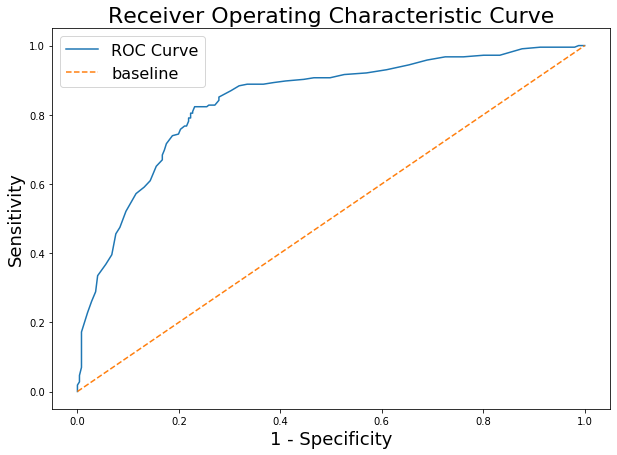

In [62]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

**Interpreting ROC AUC**

ROC is a probability curve and AUC represents the degree of separability i.e. the capability of the model in distinguishing between a positive or negative return. The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. If AUC is 1, the positive (Tesla Stock Price = 1) and negative (Tesla Stock Price = 0) are perfectly separated. 

Here, we have **an AUC of 0.7908 for Random Forest** which is our best model. This means that 79% of the predictions are accurately classified.


---
## Conclusions and Recommendations

### A. Our Classifier

We have tried several classifiers to predict whether Tesla share price will increase or decrease. **Random Forest** does the best job of classification compared to the other models and acheved the following scores:

- Accuracy:0.7896995708154506
- Precision:0.7554585152838428
- Sensitivity:0.6232558139534884
- Specificity:0.7768924302788844
- Recall:0.8046511627906977
- F1 Score:0.7792792792792792 

F1 Score is the weighted average of Precision and Recall that takes both false positives and false negatives into account. We view Specificity which refers to when the predicted class is positive(1) but actual class is zero (0), as important, during this Covid 19 period. As crisis periods usually present opportunities to buy assets at lower prices, wrong investment could result in high opportunity cost in terms of alternative use of funds during this critical period.

**Limitations**

1. Financial market forecasting is one of the most difficult practical applications and especially given market volatility. An even better score may have been attained by employing a more sophisticated model and deeper learning approach. One consideration could have been the use of LSTM, RNN and ARIMA which could have been combined in a Feedforward Neural Network to give a more accurate prediction. An approach of combining different methods through Ensemble learning could also have been adopted.

**Advantages**
1. Combines both endogenous and exogenous approach which is more holistic.
2. Scores were reasonable although improvements could certainly be made.
